In [1]:
import numpy as np
from DATA9003.exploration.LoadSales import LoadSalesData
import matplotlib.pyplot as plt

%matplotlib inline

HomeSales = LoadSalesData(SalesDir="D:/MyData/property")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107982 entries, 0 to 107981
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   borough       107982 non-null  object        
 1   zipcode       107982 non-null  float64       
 2   land_sqft     107982 non-null  float64       
 3   gross_sqft    107982 non-null  float64       
 4   tax_cls       107982 non-null  float64       
 5   building_cls  107982 non-null  object        
 6   sale_price    107982 non-null  float64       
 7   sale_date     107982 non-null  datetime64[ns]
 8   latitude      107982 non-null  float64       
 9   longitude     107982 non-null  float64       
 10  year          107982 non-null  int64         
 11  age           107982 non-null  float64       
 12  quarter       107982 non-null  int64         
 13  month         107982 non-null  int64         
 14  dist2school   107982 non-null  float64       
 15  dist2park     107

In [2]:
HomeSales["quarter"] = HomeSales["quarter"] + 4*(HomeSales["year"] - min(HomeSales["year"]))
HomeSales["month"] = HomeSales["month"] + 12*(HomeSales["year"] - min(HomeSales["year"]))
HomeSales

,borough,zipcode,land_sqft,gross_sqft,tax_cls,building_cls,sale_price,sale_date,latitude,longitude,year,age,quarter,month,dist2school,dist2park,dist2sbwy,dist2uni,dist2shore,dist2crime
0,B,11234.0,2703.0,2235.0,1.0,A5,589567.0,2006-01-02,40.622535,-73.913185,2006,2.0,1,1,0.223375,0.607336,2.847288,3.552482,1996.746683,4.312230
1,B,11218.0,1592.0,2476.0,1.0,A5,395000.0,2006-01-02,40.636282,-73.979452,2006,96.0,1,1,0.283175,0.222989,0.109492,2.248060,11400.808009,5.083803
2,SI,10305.0,2921.0,1374.0,1.0,A5,475000.0,2006-01-03,40.584793,-74.092068,2006,76.0,1,1,0.358851,0.717169,0.568853,3.333789,4803.058278,3.886803
3,Q,11420.0,2400.0,1280.0,1.0,A1,444000.0,2006-01-03,40.684552,-73.809946,2006,76.0,1,1,0.466543,0.199156,1.345638,2.231643,8514.516396,2.165292
4,Q,11375.0,2000.0,1624.0,1.0,A5,830000.0,2006-01-03,40.713911,-73.856531,2006,66.0,1,1,0.364995,1.236695,1.324867,1.059082,16613.627702,2.603210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107977,SI,10312.0,6673.0,1552.0,1.0,A5,680000.0,2020-12-31,40.556161,-74.184252,2020,9.0,60,180,1.037380,2.210167,2.080548,5.777745,3684.116035,3.262652
107978,SI,10312.0,3201.0,1920.0,1.0,A5,547500.0,2020-12-31,40.560666,-74.175982,2020,42.0,60,180,1.107954,1.363584,2.028926,4.999262,1221.465765,2.461611
107979,SI,10303.0,2700.0,1190.0,1.0,A5,395000.0,2020-12-31,40.629575,-74.164389,2020,55.0,60,180,0.642537,0.137636,7.263974,3.474248,3305.155425,3.425375
107980,Q,11355.0,1600.0,1216.0,1.0,A5,650000.0,2020-12-31,40.743048,-73.826122,2020,80.0,60,180,0.322910,0.620454,1.869662,0.673834,8767.909253,1.870587


In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sbn
import pylab

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [4]:
HouseSales = HomeSales.loc[(HomeSales.borough != "M")]
# HouseSales["detached"] = 0
# HouseSales.loc[(HouseSales.building_cls == "A1"), "detached"] = 1

# HouseSales["waterfront"] = 0
# HouseSales.loc[(HouseSales.dist2shore < 250), "waterfront"] = 1

In [5]:
predictors = HouseSales[["borough",
                         "gross_sqft",
                         "land_sqft",
                         "age",
                         "dist2crime",
                         "dist2sbwy"]]

ct = make_column_transformer((OneHotEncoder(), ["borough"]),
                                 remainder = "passthrough")

X = ct.fit_transform(predictors)

y = HouseSales.reset_index().sale_price
t = HouseSales.reset_index().quarter

In [6]:
import statsmodels.api as sm
X=pd.DataFrame(X,
               columns=["brooklyn",
                        "bronx",
                        "queens",
                        "staten"] + list(predictors.columns)[1:])

X = sm.add_constant(X)

In [7]:
from DATA9003.modelling.linear_model import RollingRegression, TrainTest

In [8]:
X_train, X_test, y_train, y_test, t_train, t_test = TrainTest(X, y, t)

In [9]:
mymodel = RollingRegression(X_train, y_train, t_train)
mymodel.fit()

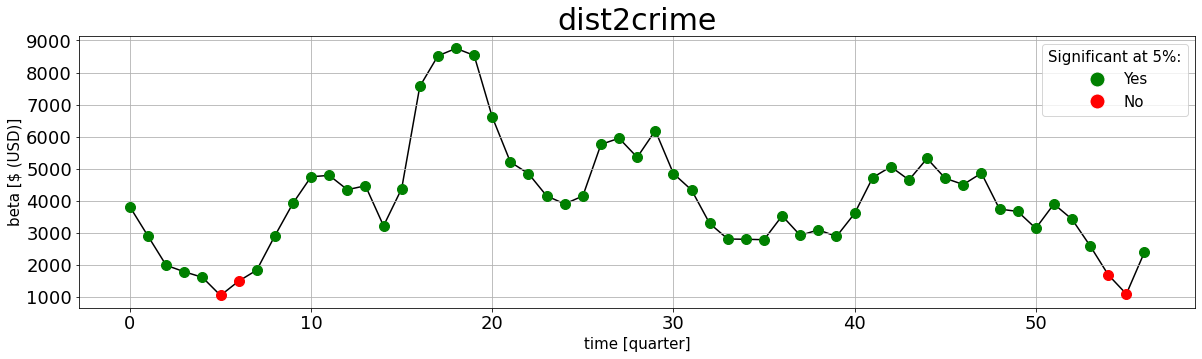

In [10]:
mymodel.PlotCoefficients(coeff="dist2crime")
plt.savefig("Report/Figures/sales/dist2crime.png")

In [22]:
y_train_pred = mymodel.predict(X_train, t_train)
y_test_pred = mymodel.predict(X_test, t_test)

In [23]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

mean_absolute_percentage_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)

(0.27506615837466203, 0.3341976473488194)

In [24]:
mean_absolute_percentage_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)

(0.27108558322973897, 0.3499684885692219)